In [4]:
import tensorflow as tf
import numpy as np
import pickle


In [6]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_8_2.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:200000, :]
x_test = input_data[200000:205000, :]


(205000, 24)


In [7]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_8_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:200000, :]
y_test = output_data[200000:205000, :]
print(output_data.shape)

(205000, 12)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 200000 samples, validate on 5000 samples
Epoch 1/100
200000/200000 - 3s - loss: 0.2849 - accuracy: 0.8806 - val_loss: 0.2361 - val_accuracy: 0.8984
Epoch 2/100
200000/200000 - 2s - loss: 0.2128 - accuracy: 0.9061 - val_loss: 0.1934 - val_accuracy: 0.9128
Epoch 3/100
200000/200000 - 2s - loss: 0.1713 - accuracy: 0.9207 - val_loss: 0.1552 - val_accuracy: 0.9265
Epoch 4/100
200000/200000 - 3s - loss: 0.1417 - accuracy: 0.9335 - val_loss: 0.1324 - val_accuracy: 0.9390
Epoch 5/100
200000/200000 - 3s - loss: 0.1208 - accuracy: 0.9451 - val_loss: 0.1118 - val_accuracy: 0.9496
Epoch 6/100
200000/200000 - 3s - loss: 0.1051 - accuracy: 0.9540 - val_loss: 0.0995 - val_accuracy: 0.9568
Epoch 7/100
200000/200000 - 3s - loss: 0.0936 - accuracy: 0.9602 - val_loss: 0.0913 - val_accuracy: 0.9616
Epoch 8/100
200000/200000 - 3s - loss: 0.0849 - accuracy: 0.9646 - val_loss: 0.0829 - val_accuracy: 0.9652
Epoch 9/100
200000/200000 - 3s - loss: 0.0773 - accuracy: 0.9683 - val_loss: 0.0777 - val_accu

Epoch 77/100
200000/200000 - 2s - loss: 0.0172 - accuracy: 0.9940 - val_loss: 0.0251 - val_accuracy: 0.9912
Epoch 78/100
200000/200000 - 2s - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0236 - val_accuracy: 0.9917
Epoch 79/100
200000/200000 - 2s - loss: 0.0171 - accuracy: 0.9940 - val_loss: 0.0259 - val_accuracy: 0.9915
Epoch 80/100
200000/200000 - 2s - loss: 0.0168 - accuracy: 0.9941 - val_loss: 0.0242 - val_accuracy: 0.9923
Epoch 81/100
200000/200000 - 2s - loss: 0.0165 - accuracy: 0.9943 - val_loss: 0.0246 - val_accuracy: 0.9921
Epoch 82/100
200000/200000 - 2s - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.0250 - val_accuracy: 0.9920
Epoch 83/100
200000/200000 - 2s - loss: 0.0169 - accuracy: 0.9941 - val_loss: 0.0244 - val_accuracy: 0.9920
Epoch 84/100
200000/200000 - 2s - loss: 0.0157 - accuracy: 0.9945 - val_loss: 0.0212 - val_accuracy: 0.9931
Epoch 85/100
200000/200000 - 2s - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0232 - val_accuracy: 0.9924
Epoch 86/100
200000/200000 -

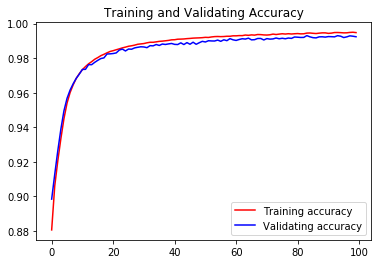

In [11]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [12]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_8_2_model.h5')